# Penerapan Logika Fuzzy Pada Control Suara TV Sebagai Alternative Menghemat Daya Listrik

### Nama : Annisa Karima R. Harahap

### NIM : 09011181722029

### Kelas : SK5A

Televisi (TV) adalah salah satu media telekomunikasi yang memiliki fungsi sebagai penerima siaran gambar yang bergerak disertai audio. Televisi merupakan gabungan dari dua kata yaitu **"Tele"** yang berarti jauh dan **"Visio"** yang berarti penglihatan. Dalam penggunaannya, TV memiliki sebuah pengoperasian suara. Pengoperasian suara pada TV dapat mempengaruhi besar atau kecilnya **pemakaian daya listrik**. Semakin besar suara yang dikeluarkan, maka semakin besar juga daya listrik yang digunakan. Dalam pengaplikasiannya, suara TV dapat dikendalikan dengan remote control. Besar suara TV ditentukan dengan jumlah penonton atau suara yang ada disekitar TV. Remote control dinilai kurang efektif karena penggunaannya masih dilakukan secara manual. Hal ini menyebabkan diperlukannya alat khusus yang dapat mengatur suara TV secara otomatis. Input yang dapat digunakan untuk percobaan alat ini berupa **amplitudo** atau kekuatan suara dengan **satuan desibel** dan **frekuensi** yang ada di sekitar TV. Kedua variabel tersebut akan dikelola agar menghasilkan output berupa **volume TV**. Pada proses ini, akan digunakan **logika fuzzy** dengan **metode mamdani** untuk menentukan volume TV sesuai dengan parameter yang disediakan.

Berdasarkan latar belakang tersebut, input dan output secara linguistik dapat dijabarkan sebagai berikut:

### Input

###### Satuan Desibel
Satuan desibel (dB)
- **Rendah** : 1 dB - 60 dB
- **Sedang** : 30 dB - 85 dB
- **Tinggi** : 60 dB - 100 dB

###### Frekuensi
Frekuensi diukur dengan satuan Hertz (Hz)
- **Rendah** : 10 Hz - 6600 Hz
- **Sedang** : 20 Hz - 16.320 Hz
- **Tinggi** : 6600 Hz - 20.000 Hz

### Output
Volume TV diukur dengan satuan desibel (dB)
- **Rendah** : 1 dB - 65 dB
- **Sedang** : 35 dB - 85 dB
- **Tinggi** : 65 dB - 100 dB

### Mengimport Beberapa Library yang Dapat Digunakan

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

- numpy : Library yang berguna untuk menggunakan operasi vektor dan matriks
- skfuzzy : Library yang berguna untuk mengaplikasikan logika fuzzy 
- matplotplib.pyplot : Library yang berguna untuk menampilkan atau memvisualisasikan data secara 2D atau 3D
- Control : Salah satu modul dari library SKFuzzy.

# 1. Fuzzyfikasi

### Menentukan Variabel dan Semesta Pembicaraan
Variabel yang dimaksud adalah input dan output dari data yang ada. Semesta pembicaraan adalah keseluruhan nilai yang diperbolehkan untuk dikelola dengan metode Fuzzy. Semesta pembiacaraan merupakan sebuah nilai real yang biasa disebut penentuan batas nilai dari masing-masing variabel. Penentuan batas variabel meliputi nilai numerik, batas awal, dan batas akhir. 

In [2]:
Desibel = ctrl.Antecedent(np.arange(1, 110, 1), 'Desibel')
Frekuensi = ctrl.Antecedent(np.arange(10, 20500, 1), 'Frekuensi')
Volume = ctrl.Consequent(np.arange(1, 103, 1), 'Volume')

#Untuk membuat plot terpisah
Desibel2 = np.arange(1, 110, 1)
Frekuensi2 = np.arange(10, 20500, 1)
Volume2 = np.arange(1, 103, 1)

`"Antecedent"` digunakan untuk input. `"Consequent"` digunakan untuk output. Angka-angka yang berada di dalam kurung menunjukkan batas dari input dan output. Format dari angka-angka tersebut adalah **(batas awal, batas akhir, kelipatan)**
Setelah format digunakan, kemudian berilah nama yang sama dengan variabel tersebut.

Untuk membuat plot terpisah dari data tersebut digunakan `np.arange` atau `Numpy Arange`

### Menentukan Nilai Linguistik

Dalam aturan fuzzy, terdapat nilai linguistik yaitu nilai dari variabel yang diterjemahkan secara kuantitatif atau pemodelan secara bahasa. Setelah menentukan semesta pembicaraan, selanjutnya tentukan nilai linguistik dengan menggunakan domain atau range yang dimiliki tiap variabel. Setiap variabel memiliki range yang mengandung nilai maksimal dan nilai minimum. Berikut nilai linguistik yang dibuat dalam bentuk tabel: 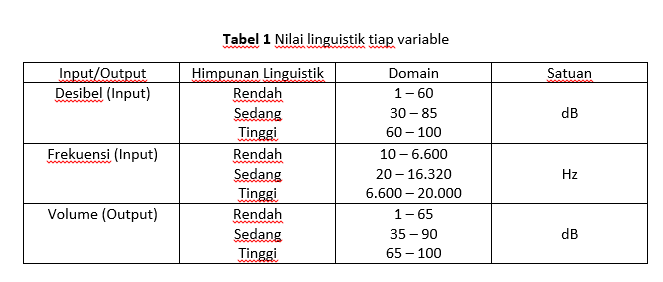

### Menentukan Fungsi Keanggotaan


Dalam aturan fuzzy terdapat fungsi kenanggotaan. Ada beberapa kurva yang dapat digunakan untuk mempresentasikan fungsi keanggotan. Dalam variabel ini, kurva yang digunakan untuk mempresentasikan fungsi keanggotaannya adalah dengan  menggunakan kurva segitiga. Berikut adalah persamaannya:

$$ f(x,a,b,c) = 
\begin{cases}
    0  &; \text{$x\leq a$ atau $x\geq c$}\\
    \frac{(x-a)}{(b-a)} & ;a \leq x \leq\ b \\
    \frac{(c-x)}{(c-b)} & ;b \leq  x \leq\ c \\
\end{cases}
$$



###### Desibel

Nilai Linguistik pada Variabel Desibel ada 3, yaitu:
- Rendah
$$ \mu Rendah [x] = 
\begin{cases}
    0  &; \text{$x\leq 1$ atau $x\geq 60$}\\
    \frac{(x-1)}{(30-1)} & ; 1 < x \leq\ 30 \\
    \frac{(30-x)}{(60-30)} & ; 30 < x < 60 \\
\end{cases}
$$

- Sedang
$$ \mu Sedang [x] = 
\begin{cases}
    0  &; \text{$x\leq 30$ atau $x\geq 85$}\\
    \frac{(x-30)}{(60-30)} & ; 30 < x \leq\ 60 \\
    \frac{(85-x)}{(85-60)} & ; 60 < x < 85 \\
\end{cases}
$$

- Tinggi
$$ \mu Tinggi [x] = 
\begin{cases}
     0  &; \text{$x\leq 60$ atau $x\geq 100$}\\
    \frac{(x-60)}{(85-60)} & ; 60 < x \leq\ 85 \\
    \frac{(100-x)}{(100-85)} & ; 85 < x < 100 \\
\end{cases}
$$

In [3]:
Desibel['rendah'] = fuzz.trimf(Desibel.universe, [1,30,60])
Desibel['sedang'] = fuzz.trimf(Desibel.universe, [30,60,85])
Desibel['tinggi'] = fuzz.trimf(Desibel.universe, [60,85,100])

#Untuk membuat plot terpisah
Desibel2_rendah = fuzz.trimf(Desibel2, [1,30,60])
Desibel2_sedang = fuzz.trimf(Desibel2, [30,60,85])
Desibel2_tinggi = fuzz.trimf(Desibel2, [60,85,100])

- fuzz.trimf = fungsi yang digunakan untuk kurva segitiga
- variabel.universe = Untuk mendefinisikan domain dari variabel.
- Angka-angka yang ada di dalam kurung formatnya adalah **(Batas awal, titik puncak, batas akhir)**

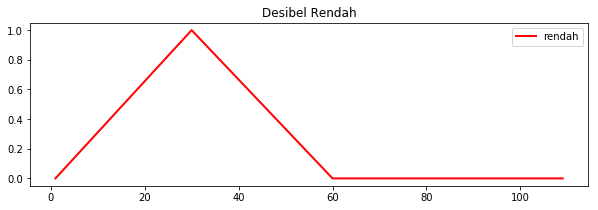

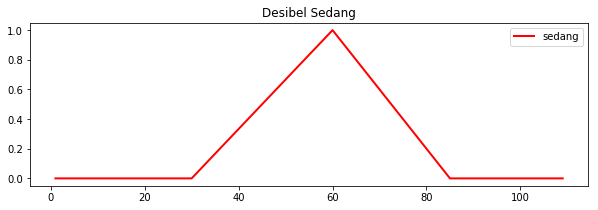

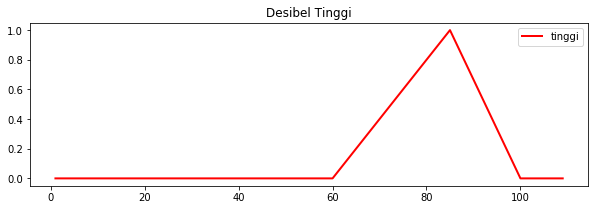

In [4]:
fig, (ax0) = plt.subplots(nrows=1, figsize=(10, 3))

ax0.plot(Desibel2,Desibel2_rendah, 'r', linewidth=2, label='rendah')
ax0.set_title('Desibel Rendah')
ax0.legend()

fig, (ax1) = plt.subplots(nrows=1, figsize=(10, 3))

ax1.plot(Desibel2,Desibel2_sedang, 'r', linewidth=2, label='sedang')
ax1.set_title('Desibel Sedang')
ax1.legend()

fig, (ax2) = plt.subplots(nrows=1, figsize=(10, 3))

ax2.plot(Desibel2,Desibel2_tinggi, 'r', linewidth=2, label='tinggi')
ax2.set_title('Desibel Tinggi')
ax2.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


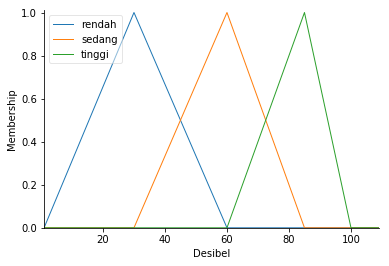

In [5]:
Desibel.view()

###### Frekuensi

Nilai Linguistik pada Variabel Frekuensi ada 3, yaitu:

- Rendah
$$ \mu Rendah [x] = 
\begin{cases}
    0  &; \text{$x\leq 10$ atau $x\geq 6600$}\\
    \frac{(x-10)}{(20-10)} & ; 10 < x \leq\ 20 \\
    \frac{(6600-x)}{(6600-20)} & ; 20 < x < 6600 \\
\end{cases}
$$

- Sedang
$$ \mu Sedang [x] = 
\begin{cases}
    0  &; \text{$x\leq 20$ atau $x\geq 16320$}\\
    \frac{(x-20)}{(6600-20)} & ; 20 < x \leq\ 6600 \\
    \frac{(16320-x)}{(16320-6600)} & ; 6600 < x < 16320 \\
\end{cases}
$$

- Tinggi
$$ \mu Tinggi [x] = 
\begin{cases}
    0  &; \text{$x\leq 6600$ atau $x\geq 20000$}\\
    \frac{(x-6600)}{(16320-6600)} & ; 6600 < x \leq\ 16320 \\
    \frac{(20000-x)}{(20000-16320)} & ; 16320 < x < 20000 \\
\end{cases}
$$

In [6]:
Frekuensi['rendah'] = fuzz.trimf(Frekuensi.universe, [10,20, 6600])
Frekuensi['sedang'] = fuzz.trimf(Frekuensi.universe, [20, 6600, 16320])
Frekuensi['tinggi'] = fuzz.trimf(Frekuensi.universe, [6600, 16320, 20000])

#Untuk membuat plot terpisah
Frekuensi2_rendah = fuzz.trimf(Frekuensi2, [10,20, 6600])
Frekuensi2_sedang = fuzz.trimf(Frekuensi2, [20, 6600, 16320])
Frekuensi2_tinggi = fuzz.trimf(Frekuensi2, [6600, 16320, 20000])


- fuzz.trimf = fungsi yang digunakan untuk kurva segitiga
- variabel.universe = Untuk mendefinisikan domain dari variabel.
- Angka-angka yang ada di dalam kurung formatnya adalah **(Batas awal, titik puncak, batas akhir)**

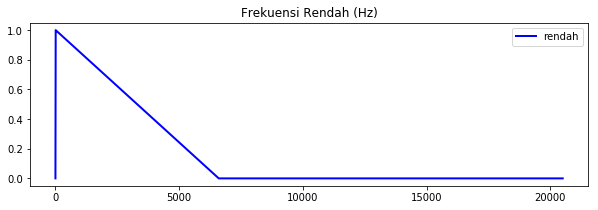

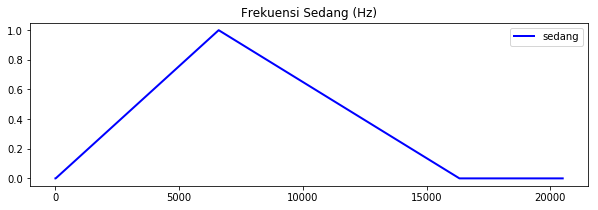

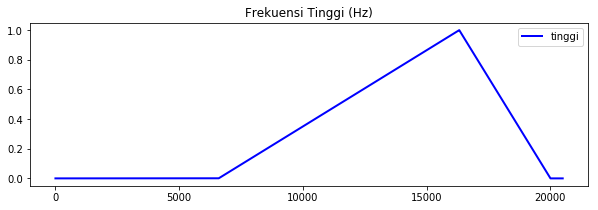

In [7]:
fig, (ax3) = plt.subplots(nrows=1, figsize=(10, 3))

ax3.plot(Frekuensi2,Frekuensi2_rendah, 'b', linewidth=2, label='rendah')
ax3.set_title('Frekuensi Rendah (Hz)')
ax3.legend()

fig, (ax4) = plt.subplots(nrows=1, figsize=(10, 3))

ax4.plot(Frekuensi2,Frekuensi2_sedang, 'b', linewidth=2, label='sedang')
ax4.set_title('Frekuensi Sedang (Hz)')
ax4.legend()

fig, (ax5) = plt.subplots(nrows=1, figsize=(10, 3))

ax5.plot(Frekuensi2,Frekuensi2_tinggi, 'b', linewidth=2, label='tinggi')
ax5.set_title('Frekuensi Tinggi (Hz)')
ax5.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


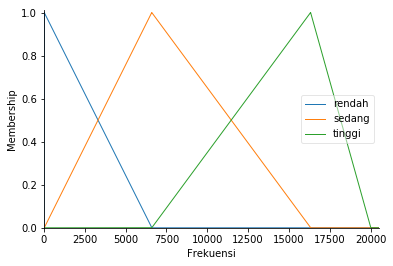

In [8]:
Frekuensi.view()

###### Volume

Nilai linguistik pada variabel Volume ada 3, yaitu:

- Rendah
$$ \mu Rendah [x] = 
\begin{cases}
    0  &; \text{$x\leq 1$ atau $x\geq 65$}\\
    \frac{(x-1)}{(35-1)} & ; 1 < x \leq\ 35 \\
    \frac{(65-x)}{(65-35)} & ; 35 < x < 65 \\
\end{cases}
$$

- Sedang
$$ \mu Sedang [x] = 
\begin{cases}
    0  &; \text{$x\leq 35$ atau $x\geq 90$}\\
    \frac{(x-35)}{(65-35)} & ; 35 < x \leq\ 65 \\
    \frac{(90-x)}{(90-65)} & ; 65 < x < 90 \\
\end{cases}
$$

- Tinggi
$$ \mu Tinggi [x] = 
\begin{cases}
    0  &; \text{$x\leq 65$ atau $x\geq 100$}\\
    \frac{(x-65)}{(90-65)} & ; 65 < x \leq\ 90 \\
    \frac{(100-x)}{(100-90)} & ; 90 < x < 100 \\
\end{cases}
$$


In [9]:
Volume['rendah'] = fuzz.trimf(Volume.universe, [1, 35, 65])
Volume['sedang'] = fuzz.trimf(Volume.universe, [35, 65, 90])
Volume['tinggi'] = fuzz.trimf(Volume.universe, [65, 90, 100])

#Untuk membuat plot terpisah
Volume2_rendah = fuzz.trimf(Volume2, [1, 35, 65])
Volume2_sedang = fuzz.trimf(Volume2, [35, 65, 90])
Volume2_tinggi = fuzz.trimf(Volume2, [65, 90, 100])

- fuzz.trimf = fungsi yang digunakan untuk kurva segitiga
- variabel.universe = Untuk mendefinisikan domain dari variabel.
- Angka-angka yang ada di dalam kurung formatnya adalah **(Batas awal, titik puncak, batas akhir)**

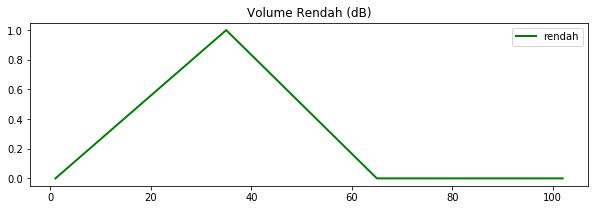

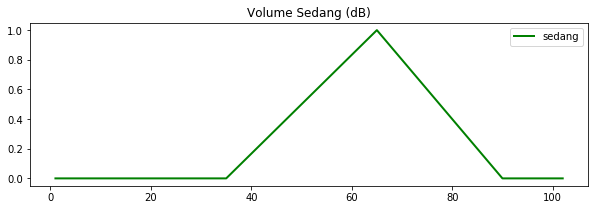

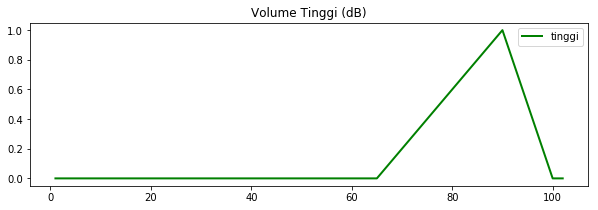

In [10]:
fig, (ax6) = plt.subplots(nrows=1, figsize=(10,3))

ax6.plot(Volume2,Volume2_rendah, 'g', linewidth=2, label='rendah')
ax6.set_title('Volume Rendah (dB)')
ax6.legend()

fig, (ax7) = plt.subplots(nrows=1, figsize=(10,3))

ax7.plot(Volume2,Volume2_sedang, 'g', linewidth=2, label='sedang')
ax7.set_title('Volume Sedang (dB)')
ax7.legend()

fig, (ax8) = plt.subplots(nrows=1, figsize=(10,3))

ax8.plot(Volume2,Volume2_tinggi, 'g', linewidth=2, label='tinggi')
ax8.set_title('Volume Tinggi (dB)')
ax8.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


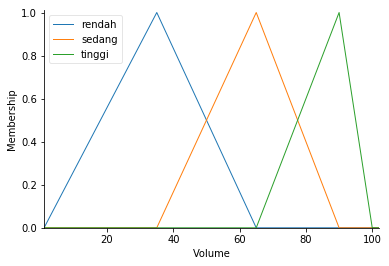

In [11]:
Volume.view()

# 2. Rule Base

Dari variabel terdapat dua input yang masing-masing input memiliki 3 derajat keanggotaan. Tentukan variabel dengan cara memangkatkan keadaan setiap input dengan jumlah input. Berdasarkan data yang dimiliki maka 3^3 = 9, sehingga terdapat 9 rule base. Rule base tersebut dapat dilihat dalam tabel berikut: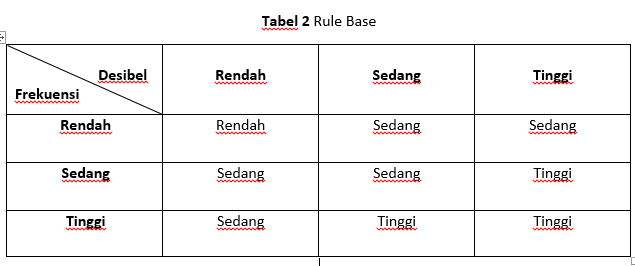

In [20]:
rule1 = ctrl.Rule(Desibel['rendah'] & Frekuensi['rendah'], Volume['rendah'])
rule2 = ctrl.Rule(Desibel['rendah'] & Frekuensi['sedang'], Volume['sedang'])
rule3 = ctrl.Rule(Desibel['rendah'] & Frekuensi['tinggi'], Volume['sedang'])
rule4 = ctrl.Rule(Desibel['sedang'] & Frekuensi['rendah'], Volume['sedang'])
rule5 = ctrl.Rule(Desibel['sedang'] & Frekuensi['sedang'], Volume['sedang'])
rule6 = ctrl.Rule(Desibel['sedang'] & Frekuensi['tinggi'], Volume['tinggi'])
rule7 = ctrl.Rule(Desibel['tinggi'] & Frekuensi['rendah'], Volume['sedang'])
rule8 = ctrl.Rule(Desibel['tinggi'] & Frekuensi['sedang'], Volume['tinggi'])
rule9 = ctrl.Rule(Desibel['tinggi'] & Frekuensi['tinggi'], Volume['tinggi'])

# 3. Mekanisme Inference

Dalam percobaan ini, metode yang digunakan adalah metode mamdani.

## Fungsi Implikasi dan Aggregat Fuzzy
- Fungsi implikasi yang dapat digunakan pada metode Mamdani adalah `MIN`. Fungsi `MIN` akan memotong hasil output dari himpunan Fuzzy.

- Aggregat adalah penggabungan semua rule base. Pada kondisi output yang sama, fungsi `MAX` dapat digunakan untuk menggabungkan semua rule base. 

### Menggabungkan semua rule untuk dijadikan sebagai control system

In [14]:
simulasi_Volume = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,])

### Menggunakan Mode Simulasi

In [15]:
Output_Volume = ctrl.ControlSystemSimulation(simulasi_Volume)

# 4. Defuzzyfikasi

### Memasukan Nilai pada Variabel Input

Sebelumnya kita sudah melakukan proses fuzzyfikasi. Selanjutnya, akan diberikan contoh kasus untuk menguji hasil dari fuzzyfikasi. Dalam hal ini saya akan memasukkan nilai input Satuan desibel sebesar 65 dB dan nilai input frekuensi sebesar 30 Hz. Jika dilihat dari nilai linguistik 65 dB berada pada himpunan fuzzy **sedang** dan **tinggi** sedangkan untuk nilai 30 Hz berada pada himpunan **rendah** dan **sedang**.

In [16]:
Output_Volume.input['Desibel'] = 65
Output_Volume.input['Frekuensi'] = 30

Setelah dimasukkan nilai input berdasarkan kasus, berikut adalah perhitungan manual untuk menentukan derajat keanggotaannya.

**Desibel :**
- Sedang
$$ \mu Sedang [x] = 
\begin{cases}
    0  &; \text{$x\leq 30$ atau $x\geq 85$}\\
    \frac{(x-30)}{(60-30)} & ; 30 < x \leq\ 60 \\
    \frac{(85-x)}{(85-60)} & ; 60 < x < 85 \\
\end{cases}
$$

$$ \mu Sedang [65] = 
    (85-65)/(85-60)
     = 0,8
$$

- Tinggi
$$ \mu Tinggi [x] = 
\begin{cases}
     0  &; \text{$x\leq 60$ atau $x\geq 100$}\\
    \frac{(x-60)}{(85-60)} & ; 60 < x \leq\ 85 \\
    \frac{(100-x)}{(100-85)} & ; 85 < x < 100 \\
\end{cases}
$$

$$ \mu Sedang [65] = 
    (65-60)/(85-60)
     = 0,2
$$

**Frekuensi**
- Rendah
$$ \mu Rendah [x] = 
\begin{cases}
    0  &; \text{$x\leq 10$ atau $x\geq 6600$}\\
    \frac{(x-10)}{(20-10)} & ; 10 < x \leq\ 20 \\
    \frac{(6600-x)}{(6600-20)} & ; 20 < x < 6600 \\
\end{cases}
$$

$$ \mu Rendah [30] = 
    (6600-30)/(6600-20)
     = 0,998
$$

- Sedang
$$ \mu Sedang [x] = 
\begin{cases}
    0  &; \text{$x\leq 20$ atau $x\geq 16320$}\\
    \frac{(x-20)}{(6600-20)} & ; 20 < x \leq\ 6600 \\
    \frac{(16320-x)}{(16320-6600)} & ; 6600 < x < 16320 \\
\end{cases}
$$

$$ \mu Sedang [30] = 
    (30-20)/(6600-20)
     = 0,001
$$

### Evaluasi Rule Base

Berdasarkan hasil input, ada 4 kemungkinan rule base yang terjadi yakni:
1. Jika Desibel **Sedang** (0,8) dan Frekuensi **Rendah** (0,998) maka Volume **Sedang**  
   Min (0,8, 0,998)

2. Jika Desibel **Sedang** (0,8) dan Frekuensi **Sedang** (0,001) maka Volume **Sedang**  
   Min (0,001, 0,8)

3. Jika Desibel **Tinggi** (0,2) dan Frekuensi **Rendah** (0,998) maka Volume **Sedang**  
   Min (0,2, 0,998)

4. Jika Desibel **Tinggi** (0,2) dan Frekuensi **Sedang** (0,001) maka Volume **Tinggi**  
   Min (0,001, 0,2)

Nilai Min tersebut akan menjadi titik puncak dari output yang akan dikelola kurva.

In [17]:
Output_Volume.compute()

In [18]:
print (Output_Volume.output['Volume'])

63.296771190691686


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


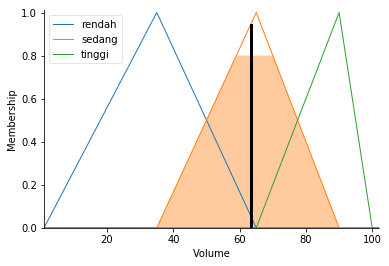

In [19]:
Volume.view(sim=Output_Volume)

### Perhitungan Manual 

Untuk menghitung secara manual, digunakan metode centroid. Metode centroid digunakan untuk mencari Center of Gravity yaang didasarkan dari hasil aggregat fuzzy. Di dalam grafik yang terarsir, terdapat tiga gambar yaitu segitiga atas, persegi panjang dan segitiga bawah.

- Untuk mencari nilai x segitiga atas

$$
\mu[x] = \frac{x-a}{b-a} \\
0,8 = \frac{x-35}{65-35} \\
0,8 \times30 = x - 35 \\
x = 24 + 35 \\
x = 59 \\
$$

- Untuk mencari nilai x pada segitiga bawah

$$
\mu[x] = \frac{b-x}{b-a} \\
0,8 = \frac{90-x}{90-65} \\
0,8 \times25 = 90 - x \\
x = 90 - 20 \\
x = 70 \\
$$

- Untuk mencari X1 (Nilai tengah segitiga atas)

$$
X1 = a + \frac{2}{3}(x-a) \\
X1 = 35 + \frac{2}{3}(59 - 35) \\
X1 = 35 + \frac{2}{3}(24) \\
X1 = 35 + 16 \\
X1 = 51
$$


- Untuk mencari X2 (Nilai tengah persegi panjang)

$$
X2 = \frac{1}{2}(x.Segitiga Bawah+x.Segitiga Atas)  \\
X2 = \frac{1}{2}(59+70) \\
X2 = \frac{1}{2}(129)  \\
X2 = 64,5
$$


- Untuk mencari X3 (Nilai tengah sgitiga bawah)

$$
X3 = x.segitiga atas + \frac{1}{3}(x.segitiga atas - x.segitiga bawah) \\
X3 = 70 + \frac{1}{3}(70 - 59) \\
X3 = 70 + \frac{1}{3}(11) \\
X3 = 70 + 3,67 \\
X3 = 73,67 \\
$$

- Untuk mencari A1 (Luas segitiga atas)

$$
A1 = \frac{1}{2}(a\times t) \\
A1 = \frac{1}{2}(x-a)\times0,8 \\
A1 = \frac{1}{2}(59-35)\times0,8 \\
A1 = \frac{1}{2}(24)\times0,8 \\
A1 = 9,6
$$


- Untuk mencari A2 (Luas persegi panjang)

$$
A2 = (x.Segitiga Bawah - x.Segitiga Atas)\times l \\
A2 = (70 - 59)\times 0,8 \\
A2 = 11\times 0,8 \\
A2 = 8,8 \\
$$

- Untuk mencari A3 (Luas segitiga bawah)

$$
A3 = \frac{1}{2}(a\times t) \\
A3 = \frac{1}{2}(b-x)\times0,8 \\
A3 = \frac{1}{2}(90-70)\times0,8 \\
A3 = \frac{1}{2}(20)\times0,8 \\
A3 = 8
$$

- Hasil akhir/Output 

$$
\sum_n^i\frac{Xi\times Ai}{Ai} \\
= \frac{(X1\times A1)+(X2\times A2)+(X3\times A3)}{A1 + A2 + A3} \\
= \frac{(51\times 9,6)+(64,5\times 8,8)+(73,67\times 8)}{9 + 8,8 + 8} \\
= \frac{(489,6)+(567,6)+(589,36)}{26,4} \\
= \frac{1646,56}{26,4} \\
= 62,36969697
$$

Berdasarkan peerhitungan di python output bernilai 63,296771190691686 dan berdasarkan perhitungan manual bernilai 62,36969697. Selisih antara perhitungan di python dan manual sebesar 0,93. Kemudian besar suara TV yang akan dikeluarkan bernilai linguistik sedang.

### Refrensi
- L. Fuzzy, V. Televisi, and D. Listrik, “PENERAPAN LOGIKA FUZZY PADA CONTROL SUARA TV,” no. 978, pp. 135–148, 2017.
- S. Pakar, “Himpunan Fuzzy.”